## Lead scoring case study
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

###  Importing Data

In [11]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Importing all datasets
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
lead.shape

(9240, 37)

In [15]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
round(lead.isnull().sum()/lead.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

## as we can see that there are lot of vlaue in columns as select so the best is to convert. 'Select' values are as good as NULL. So we can convert these values to null values.

In [17]:
lead = lead.replace('Select', np.nan)

In [18]:
round(lead.isnull().sum()/len(lead),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [22]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## drop column having null value more than 40%

In [23]:
lead.columns[round(lead.isnull().sum()/len(lead),2)*100>=40]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [24]:
lead1 = lead.drop(columns=lead.columns[round(lead.isnull().sum()/len(lead),2)*100>40])

In [25]:
round(lead1.isnull().sum().sort_values(ascending=False)/len(lead1),2)*100

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Lead Source                                       0.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Digital Advertisement       

In [26]:
lead1.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

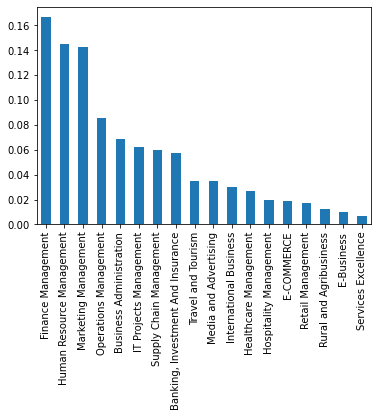

In [27]:
lead1.Specialization.value_counts(normalize=True).plot.bar()
plt.show()

In [28]:
lead1.Specialization = lead1['Specialization'].fillna('Other Specialization')

In [29]:
lead1.Specialization.isnull().sum()

0

In [30]:
lead1.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

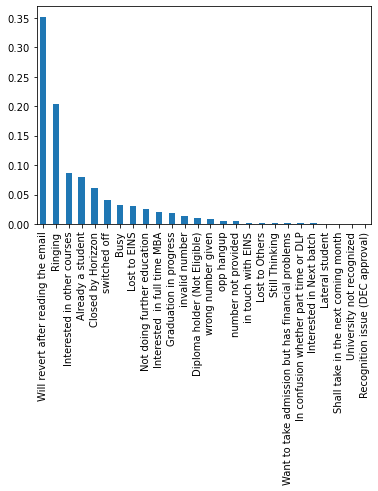

In [31]:
lead1.Tags.value_counts(normalize=True).plot.bar()
plt.show()

In [32]:
lead1.Tags.mode()[0]

'Will revert after reading the email'

In [33]:
lead1.Tags = lead1.Tags.fillna(lead1.Tags.mode()[0])

In [34]:
lead1.Tags.isnull().sum()

0

In [35]:
lead1['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

<AxesSubplot:>

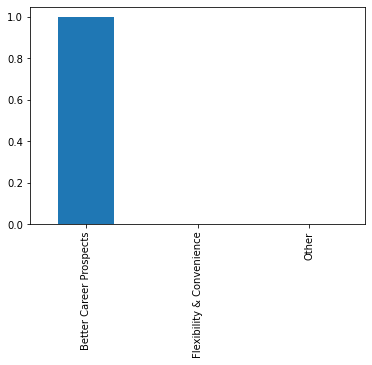

In [36]:
lead1['What matters most to you in choosing a course'].value_counts(normalize=True).plot.bar()

In [37]:
## highly skew drop the column

In [38]:
lead1.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [39]:
lead1['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

<AxesSubplot:>

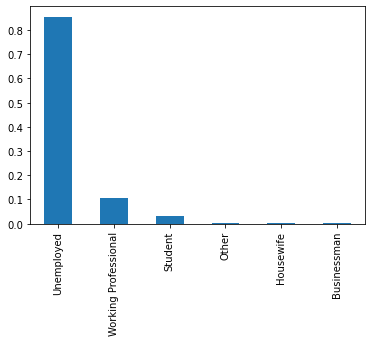

In [40]:
lead1['What is your current occupation'].value_counts(normalize=True).plot.bar()

In [41]:
lead1['What is your current occupation'].mode()[0]

'Unemployed'

In [42]:
lead1['What is your current occupation'] = lead1['What is your current occupation'].fillna(lead1['What is your current occupation'].mode()[0])

In [43]:
lead1['What is your current occupation'].isnull().sum()

0

In [44]:
lead1.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

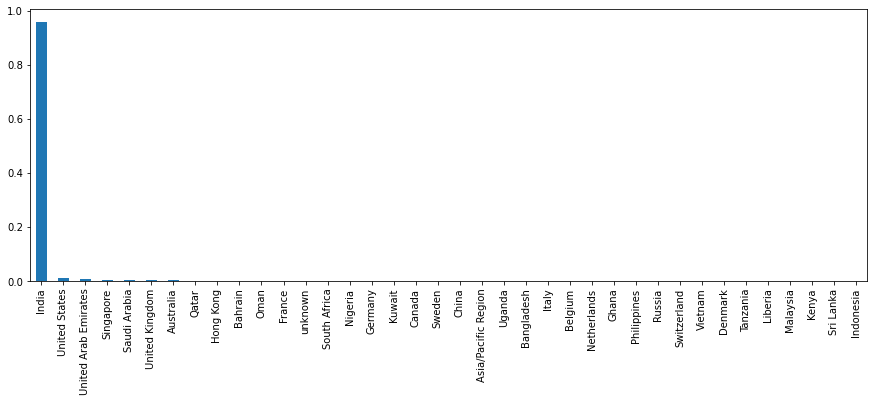

In [45]:
plt.figure(figsize=(15,5))
lead1.Country.value_counts(normalize=True).plot.bar()
plt.show()

In [46]:
lead1.Country.mode()[0]

'India'

In [47]:
lead1.Country = lead1.Country.fillna(lead1.Country.mode()[0])

In [48]:
lead1.Country.isnull().sum()

0

In [49]:
lead1.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

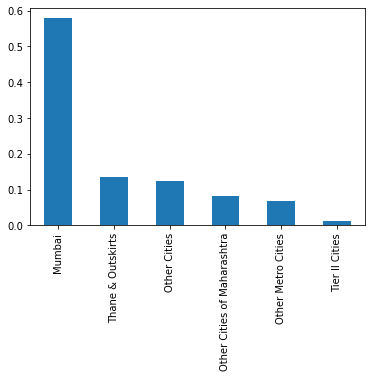

In [50]:
lead1.City.value_counts(normalize=True).plot.bar()
plt.show()

In [51]:
lead1.City.mode()[0]

'Mumbai'

In [52]:
lead1.City = lead1.City.fillna(lead1.City.mode()[0])

In [53]:
lead1.City.isnull().sum()

0

In [54]:
lead1.dropna(inplace=True)

In [55]:
round(lead1.isnull().sum().sort_values(ascending=False)/len(lead1),2)*100

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [56]:
lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [57]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [58]:
# checking for duplicate

In [59]:
lead1[lead1.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [60]:
# no duplicate in record

In [61]:
lead1.Converted.value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [62]:
# lead conversion is 37.8 percentage

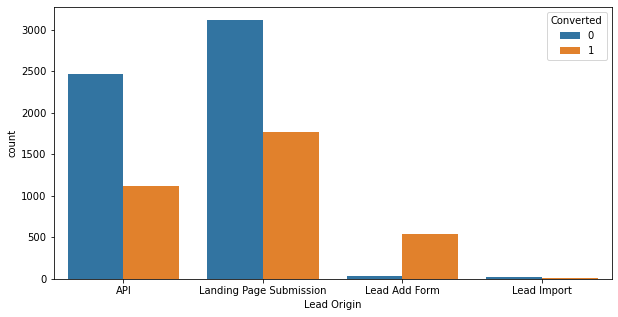

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Lead Origin',hue='Converted')
plt.show()

In [64]:
# landing page submission and API have conversion rate
# lead Add form have higher conversion rate

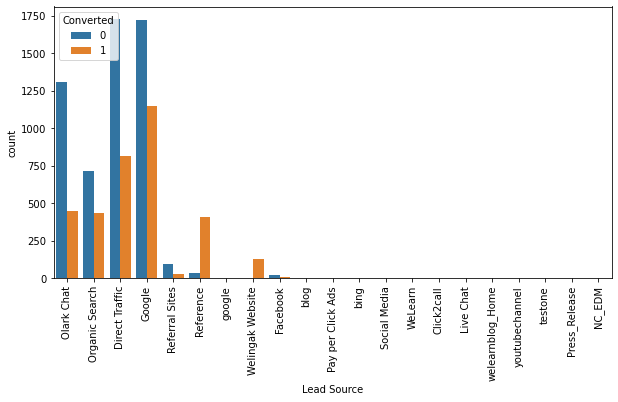

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [66]:
## google and direct traffic have high rate for conversion

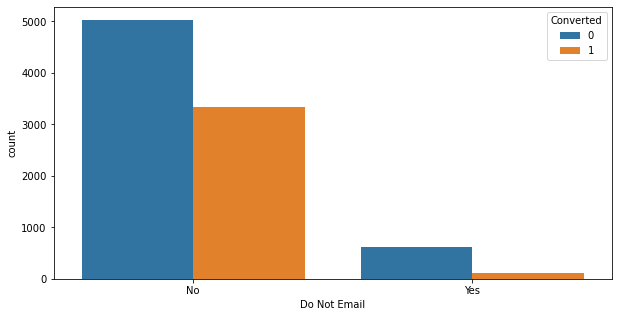

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Do Not Email',hue='Converted')
plt.show()

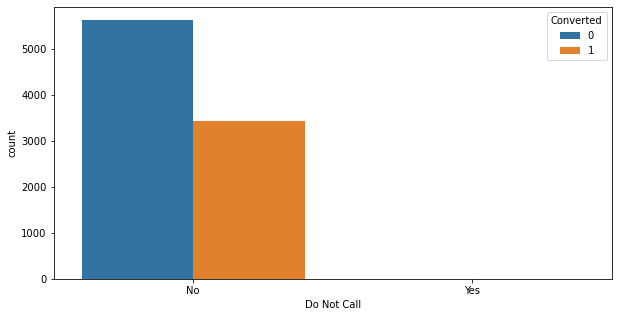

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Do Not Call',hue='Converted')
plt.show()

In [69]:
lead1['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [70]:
lead1['TotalVisits'].quantile([0.05,0.95,0.99])

0.05     0.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

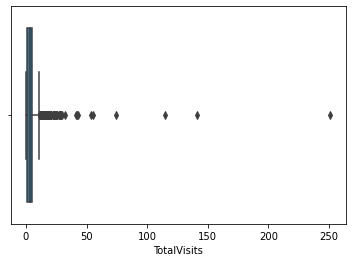

In [71]:
sns.boxplot(lead1['TotalVisits'])
plt.show()

In [72]:
## outlier present in data, it will hamper the test, therefore cap it.

In [73]:
cap = lead1['TotalVisits'].quantile([0.05,0.95]).values
lead1['TotalVisits'][lead1['TotalVisits']<=cap[0]]=cap[0]
lead1['TotalVisits'][lead1['TotalVisits']>=cap[1]]=cap[1]

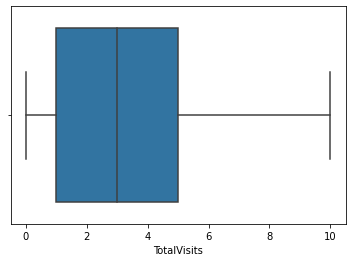

In [74]:
sns.boxplot(lead1['TotalVisits'],orient='vert')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

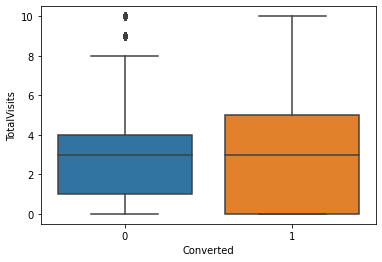

In [75]:
sns.boxplot(data=lead1,y='TotalVisits',x='Converted')

In [76]:
## cannot conclude any thing

In [77]:
lead1['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

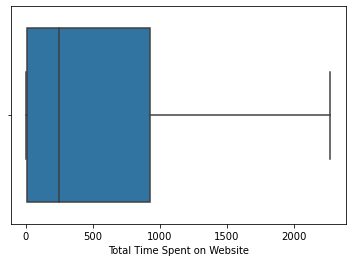

In [78]:
sns.boxplot(lead1['Total Time Spent on Website'])
plt.show()

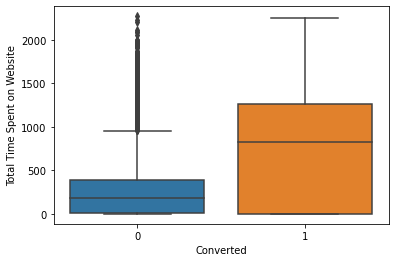

In [79]:
sns.boxplot(data=lead1,y='Total Time Spent on Website',x='Converted')
plt.show()

In [80]:
# people are more engaging on website they have more chance of converted

In [81]:
lead1['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

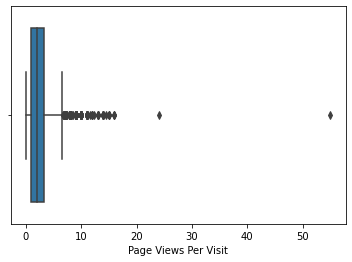

In [82]:
sns.boxplot(lead1['Page Views Per Visit'])
plt.show()

In [83]:
## outlier present in data, cap outlier

In [84]:
cap1 = lead1['Page Views Per Visit'].quantile([0.05,0.95]).values
lead1['Page Views Per Visit'][lead1['Page Views Per Visit']<=cap[0]]=cap[0]
lead1['Page Views Per Visit'][lead1['Page Views Per Visit']>=cap[1]]=cap[1]

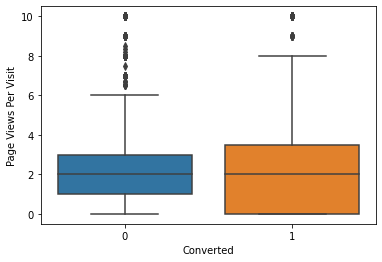

In [85]:
sns.boxplot(data=lead1,y='Page Views Per Visit',x='Converted')
plt.show()

In [86]:
## nothing can be conclude

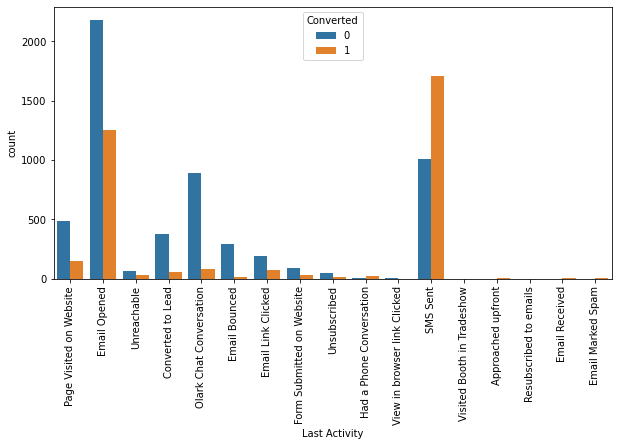

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [88]:
## lead conversion for SMS sent have high rate as last activity
## those who have Email opened as last activity have conversion rate

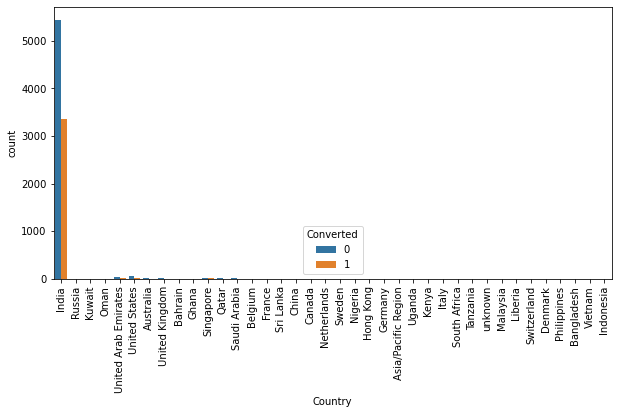

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Country',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [90]:
## most cases from india

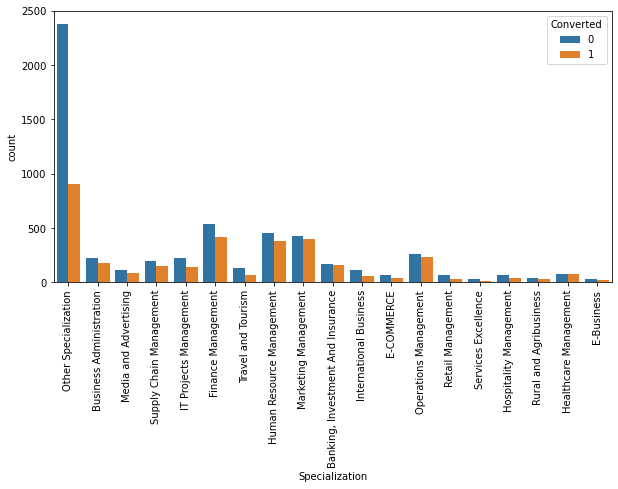

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

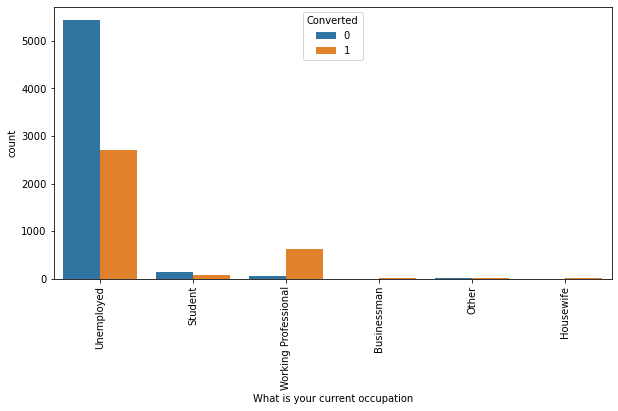

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [93]:
## working professional have high RATE of joining
## umemployed people have more chance of joining

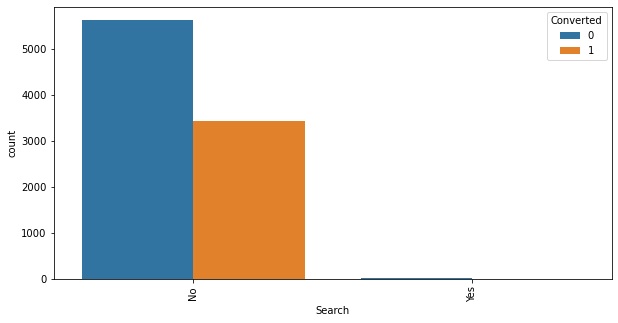

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Search',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [95]:
## most entries are No, means customer haven't seen any ads

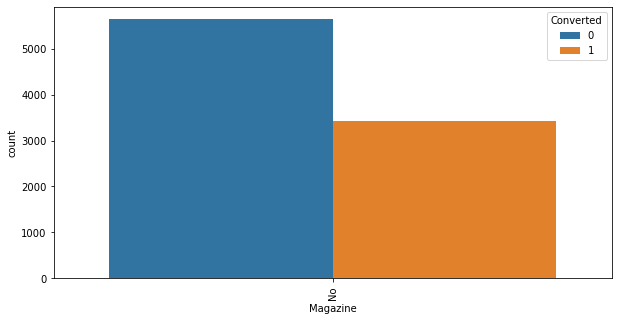

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Magazine',hue='Converted')
plt.xticks(rotation=90)
plt.show()

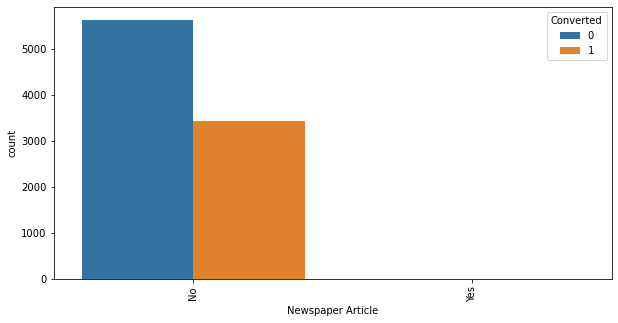

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Newspaper Article',hue='Converted')
plt.xticks(rotation=90)
plt.show()

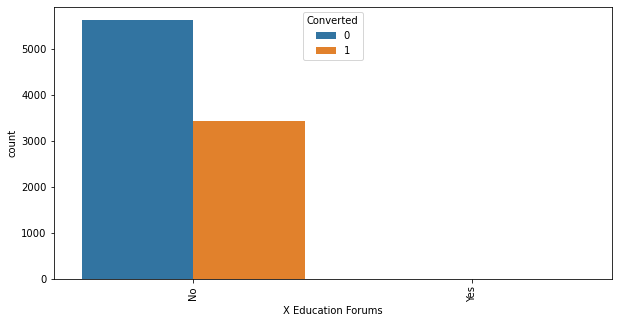

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='X Education Forums',hue='Converted')
plt.xticks(rotation=90)
plt.show()

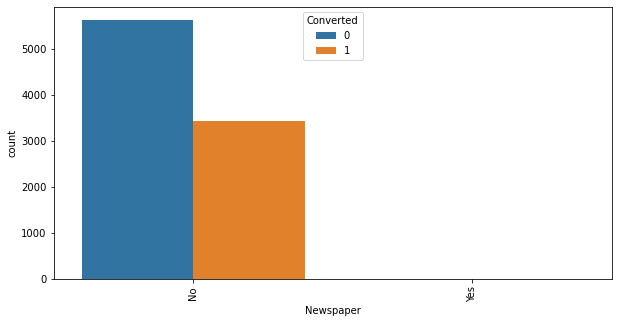

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Newspaper',hue='Converted')
plt.xticks(rotation=90)
plt.show()

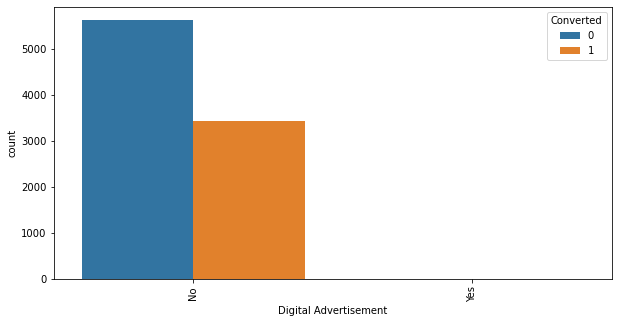

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Digital Advertisement',hue='Converted')
plt.xticks(rotation=90)
plt.show()

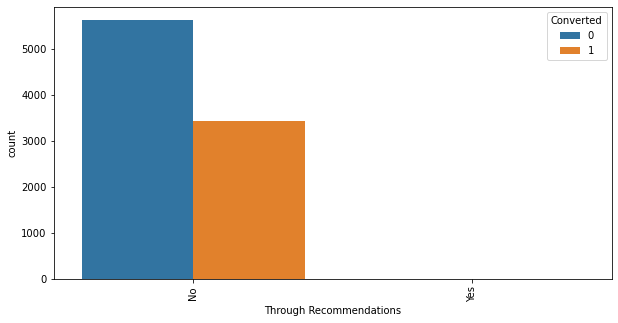

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Through Recommendations',hue='Converted')
plt.xticks(rotation=90)
plt.show()

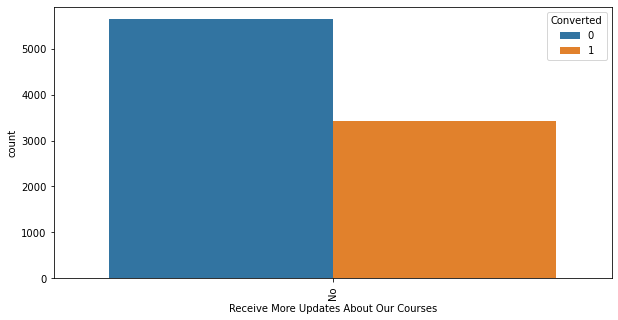

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Receive More Updates About Our Courses',hue='Converted')
plt.xticks(rotation=90)
plt.show()

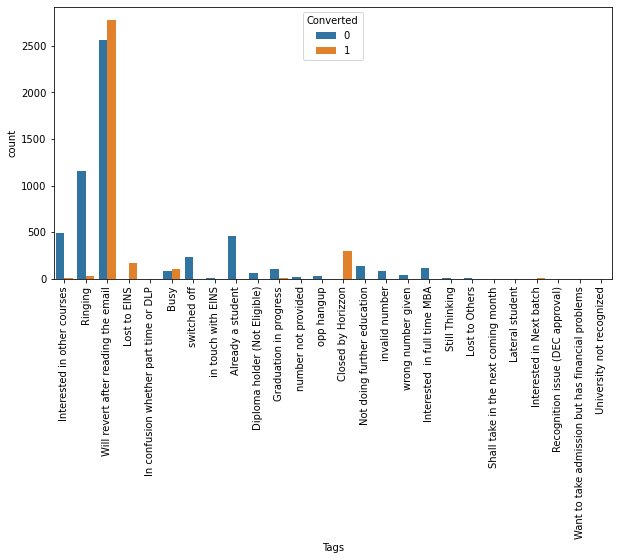

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

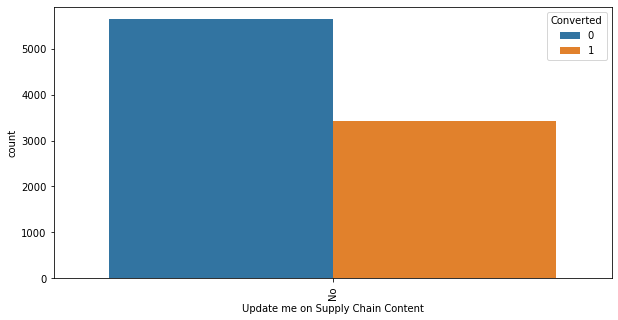

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Update me on Supply Chain Content',hue='Converted')
plt.xticks(rotation=90)
plt.show()

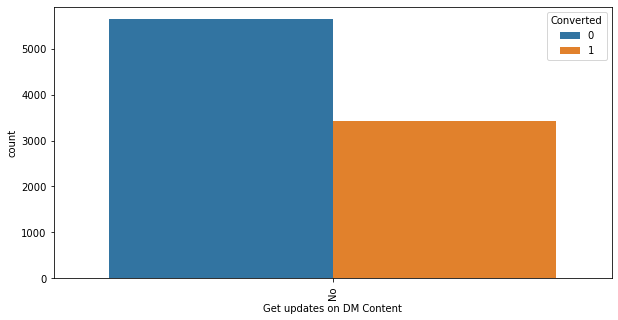

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Get updates on DM Content',hue='Converted')
plt.xticks(rotation=90)
plt.show()

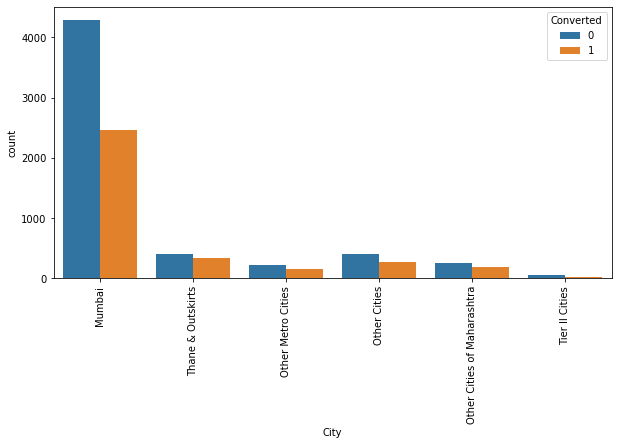

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='City',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [107]:
## city mumbai have higher conversion rate

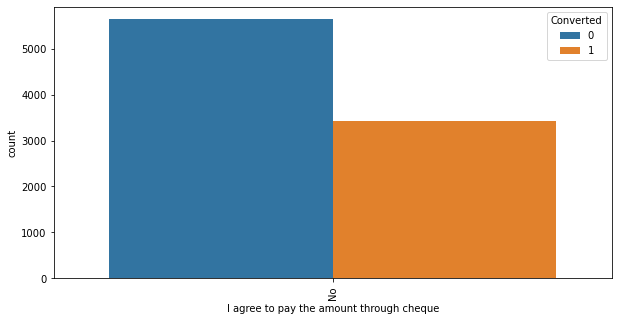

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='I agree to pay the amount through cheque',hue='Converted')
plt.xticks(rotation=90)
plt.show()

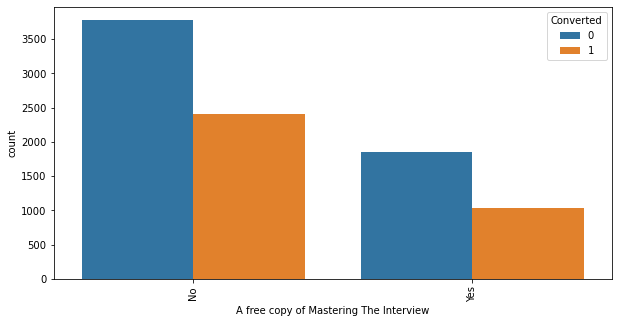

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='A free copy of Mastering The Interview',hue='Converted')
plt.xticks(rotation=90)
plt.show()

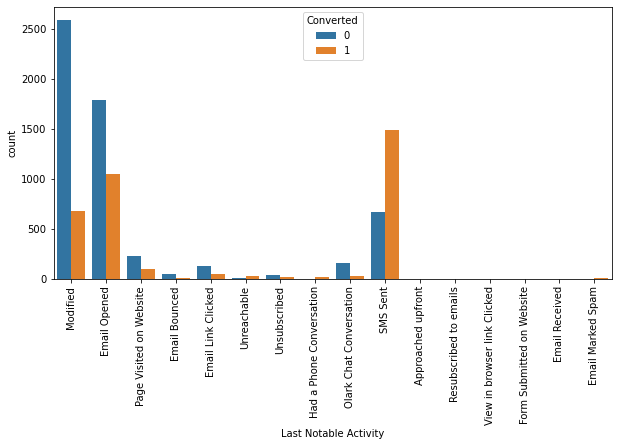

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(data=lead1, x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [111]:
## drop column which have no use in data analysis

In [112]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [113]:
lead1 = lead1.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums',
                    'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                    'Tags','Update me on Supply Chain Content','I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview','Get updates on DM Content'], axis=1)

In [114]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [115]:
lead1.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Mumbai,Modified


###  Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [116]:
varlist =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead1[varlist] = lead[varlist].apply(binary_map)

In [117]:
lead1.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Mumbai,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [118]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead1[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Activity','What is your current occupation',
                              'City','Last Notable Activity','Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead1 = pd.concat([lead1, dummy1], axis=1)

In [119]:
lead1.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,1,0,0,0,0,0


In [120]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 112 entries, Prospect ID to Specialization_Travel and Tourism
dtypes: float64(2), int64(4), object(8), uint8(98)
memory usage: 2.1+ MB


#### Dropping the repeated variables

In [121]:
# We have created dummies for the below variables, so we can drop them
lead1 = lead1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Activity','What is your current occupation',
                              'City','Last Notable Activity','Specialization'], 1)

In [122]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 105 entries, Prospect ID to Specialization_Travel and Tourism
dtypes: float64(2), int64(4), object(1), uint8(98)
memory usage: 1.7+ MB


Now you can see that you have all variables as numeric.

### Test-Train Split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
# Putting feature variable to X
X = lead1.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [125]:
# Putting response variable to y
y = lead1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,0,0,-0.432779,-0.160255,-0.178762,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.178762,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.170309,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.178762,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.069125,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
### Checking the lead converts
lead_convert = (sum(lead1['Converted'])/len(lead1['Converted'].index))*100
lead_convert

37.85541106458012

We have almost 38% lead conversion

### Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [130]:
import statsmodels.api as sm

In [131]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Mar 2023   Deviance:                   1.2867e+05
Time:                        20:24:52   Pearson chi2:                 6.29e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 7.247e+15   9.54e+07    7.6e+07      0.000    7.25e+15    7.25e+15
Do Not Email                                         -7.657e+14   4.44e+06  -1.72e+08      0.000   -7.66e+14   -7.66e+14
Do Not Call                                           2.158e+15   4.77e+07   4.52e+07      0.000    2.16e+15    2.16e+15
TotalVisits                                           3.054e+13   1.46e+06   2.09e+07      0.000    3.05e+13    3.05e+13
Total Time Spent on Website                           2.629e+13   9.84e+05   2.67e+07      0.000    2.63e+13    2.63e+13
Page Views Per Visit                                 -1.168e+13   1.49e+06  -7.85e+06      0.000   -1.17e+13   -1.17e+13
Lead Origin_Landing Page Submission                  -2.215e+14   3.34e+06  -6.63e+07      0.000   -2.21e+14   -2.21e+14
Lead Origin_Lead Add Form                            -9.971e+14   4.76e+07  -2.09e+07      0.000   -9.97e+14   -9.97e+14
Lead Origin_Lead Import                               1.541e+15    6.9e+07   2.23e+07      0.000    1.54e+15    1.54e+15
Lead Source_Direct Traffic                           -2.686e+15   6.16e+07  -4.36e+07      0.000   -2.69e+15   -2.69e+15
Lead Source_Facebook                                 -4.206e+15   9.14e+07   -4.6e+07      0.000   -4.21e+15   -4.21e+15
Lead Source_Google                                   -2.548e+15   6.15e+07  -4.14e+07      0.000   -2.55e+15   -2.55e+15
Lead Source_Live Chat                                  7.18e+15   6.14e+07   1.17e+08      0.000    7.18e+15    7.18e+15
Lead Source_NC_EDM                                    5.381e+14   9.11e+07   5.91e+06      0.000    5.38e+14    5.38e+14
Lead Source_Olark Chat                               -2.069e+15   6.14e+07  -3.37e+07      0.000   -2.07e+15   -2.07e+15
Lead Source_Organic Search                           -2.538e+15   6.16e+07  -4.12e+07      0.000   -2.54e+15   -2.54e+15
Lead Source_Pay per Click Ads                        -4.631e+15   9.12e+07  -5.08e+07      0.000   -4.63e+15   -4.63e+15
Lead Source_Press_Release                            -4.922e+15   9.17e+07  -5.37e+07      0.000   -4.92e+15   -4.92e+15
Lead Source_Reference                                 -4.33e+14    3.9e+07  -1.11e+07      0.000   -4.33e+14   -4.33e+14
Lead Source_Referral Sites                           -2.387e+15    6.2e+07  -3.85e+07      0.000   -2.39e+15   -2.39e+15
Lead Source_Social Media                             -1.185e+15   7.78e+07  -1.52e+07      0.000   -1.19e+15   -1.19e+15
Lead Source_WeLearn                                     19.0294   7.33e-07    2.6e+07      0.000      19.029      19.029
Lead Source_Welingak Website                         -2.93

###  Feature Selection Using RFE

In [132]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [133]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [134]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False])

In [135]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 19),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 78),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_WeLearn', False, 84),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 35),
 ('Lead Source_google', False, 21),
 ('Lead Source_testone', False

In [136]:
col = X_train.columns[rfe.support_]

In [137]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_

##### Assessing the model with StatsModels

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Tue, 21 Mar 2023   Deviance:                       5220.5
Time:                        20:25:02   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7505      0.131     13.363      0.000       1.494       2.007
Do Not Email                                            -1.5499      0.201     -7.728      0.000      -1.943      -1.157
Total Time Spent on Website                              0.9924      0.037     26.503      0.000       0.919       1.066
Lead Origin_Landing Page Submission                     -1.3155      0.127    -10.333      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6767      0.227     11.774      0.000       2.231       3.122
Lead Source_Direct Traffic                              -0.3613      0.091     -3.950      0.000      -0.541      -0.182
Lead Source_Organic Search                              -0.4014      0.109     -3.691      0.000      -0.614      -0.188
Lead Source_Referral Sites                              -0.7305      0.331     -2.206      0.027      -1.379      -0.081
Lead Source_Welingak Website                             2.6054      0.758      3.437      0.001       1.120       4.091
Last Activity_Converted to Lead                         -0.5437      0.113     -4.819      0.000      -0.765      -0.323
Last Activity_Converted to Lead                         -0.5437      0.113     -4.819      0.000      -0.765      -0.323
Last Activity_Email Bounced                             -0.5896      0.215     -2.736      0.006      -1.012      -0.167
Last Activity_Email Bounced                             -0.5896      0.215     -2.736      0.006      -1.012      -0.167
Last Activity_Had a Phone Conversation                   0.8407      0.391      2.148      0.032       0.073       1.608
Last Activity_Had a Phone Conversation                   0.8407      0.391      2.148      0.032       0.073       1.608
Last Activity_Olark Chat Conversation                   -0.5793      0.098     -5.901      0.000      -0.772      -0.387
Last Activity_Olark Chat Conversation                   -0.5793      0.098     -5.901      0.000      -0.772      -0.387
What is your current occupation_Housewife               22.7967   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Working Professional     2.6151      0.194     13.489      0.000       2.235       2.995
Last Notable Activity_Email Link Clicked                -1.7728      0.258     -6.864      0.000      -2.279      -1.267
Last Notable Activity_Email Opened                      -1.4429      0.088    -16.357      0.000      -1.616      -1.270
Last Notable Activity_Modified                          -1.7823      0.100    -17.739      0.000      -1.979      -1.585
Last Notable Activity_Olark Chat Conversation           -1

In [139]:
## pvalue of What is your current occupation_Housewife if high therefore drop this column

In [140]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [141]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Tue, 21 Mar 2023   Deviance:                       5229.2
Time:                        20:25:04   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7503      0.131     13.368      0.000       1.494       2.007
Do Not Email                                            -1.5512      0.201     -7.734      0.000      -1.944      -1.158
Total Time Spent on Website                              0.9916      0.037     26.513      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3156      0.127    -10.344      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6930      0.227     11.858      0.000       2.248       3.138
Lead Source_Direct Traffic                              -0.3605      0.091     -3.945      0.000      -0.540      -0.181
Lead Source_Organic Search                              -0.3919      0.108     -3.612      0.000      -0.605      -0.179
Lead Source_Referral Sites                              -0.7291      0.331     -2.203      0.028      -1.378      -0.080
Lead Source_Welingak Website                             2.5910      0.758      3.418      0.001       1.105       4.077
Last Activity_Converted to Lead                         -0.5437      0.113     -4.821      0.000      -0.765      -0.323
Last Activity_Converted to Lead                         -0.5437      0.113     -4.821      0.000      -0.765      -0.323
Last Activity_Email Bounced                             -0.5889      0.215     -2.734      0.006      -1.011      -0.167
Last Activity_Email Bounced                             -0.5889      0.215     -2.734      0.006      -1.011      -0.167
Last Activity_Had a Phone Conversation                   0.8396      0.391      2.145      0.032       0.072       1.607
Last Activity_Had a Phone Conversation                   0.8396      0.391      2.145      0.032       0.072       1.607
Last Activity_Olark Chat Conversation                   -0.5782      0.098     -5.890      0.000      -0.771      -0.386
Last Activity_Olark Chat Conversation                   -0.5782      0.098     -5.890      0.000      -0.771      -0.386
What is your current occupation_Working Professional     2.6103      0.194     13.462      0.000       2.230       2.990
Last Notable Activity_Email Link Clicked                -1.7639      0.257     -6.862      0.000      -2.268      -1.260
Last Notable Activity_Email Opened                      -1.4356      0.088    -16.290      0.000      -1.608      -1.263
Last Notable Activity_Modified                          -1.7813      0.100    -17.733      0.000      -1.978      -1.584
Last Notable Activity_Olark Chat Conversation           -1.4536      0.376     -3.871      0.000      -2.190      -0.718
Last Notable Activity_Page Visited on Website           -1

## checking vif

In [142]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Bounced,inf
10,Last Activity_Email Bounced,inf
15,Last Activity_Olark Chat Conversation,inf
14,Last Activity_Olark Chat Conversation,inf
13,Last Activity_Had a Phone Conversation,inf
12,Last Activity_Had a Phone Conversation,inf
8,Last Activity_Converted to Lead,inf
9,Last Activity_Converted to Lead,inf
2,Lead Origin_Landing Page Submission,3.41
19,Last Notable Activity_Modified,2.71


In [144]:
col1 = col1.drop('Last Activity_Email Bounced',1)

In [145]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.0
Date:                Tue, 21 Mar 2023   Deviance:                       5238.1
Time:                        20:25:08   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7570      0.131     13.436      0.000       1.501       2.013
Do Not Email                                            -1.8546      0.177    -10.456      0.000      -2.202      -1.507
Total Time Spent on Website                              0.9934      0.037     26.579      0.000       0.920       1.067
Lead Origin_Landing Page Submission                     -1.3150      0.127    -10.349      0.000      -1.564      -1.066
Lead Origin_Lead Add Form                                2.7205      0.228     11.951      0.000       2.274       3.167
Lead Source_Direct Traffic                              -0.3657      0.091     -4.003      0.000      -0.545      -0.187
Lead Source_Organic Search                              -0.3938      0.108     -3.632      0.000      -0.606      -0.181
Lead Source_Referral Sites                              -0.7194      0.331     -2.173      0.030      -1.368      -0.071
Lead Source_Welingak Website                             2.6152      0.761      3.435      0.001       1.123       4.108
Last Activity_Converted to Lead                         -0.5367      0.113     -4.759      0.000      -0.758      -0.316
Last Activity_Converted to Lead                         -0.5367      0.113     -4.759      0.000      -0.758      -0.316
Last Activity_Had a Phone Conversation                   0.8513      0.397      2.147      0.032       0.074       1.628
Last Activity_Had a Phone Conversation                   0.8513      0.397      2.147      0.032       0.074       1.628
Last Activity_Olark Chat Conversation                   -0.5700      0.098     -5.806      0.000      -0.762      -0.378
Last Activity_Olark Chat Conversation                   -0.5700      0.098     -5.806      0.000      -0.762      -0.378
What is your current occupation_Working Professional     2.6066      0.193     13.490      0.000       2.228       2.985
Last Notable Activity_Email Link Clicked                -1.7686      0.257     -6.874      0.000      -2.273      -1.264
Last Notable Activity_Email Opened                      -1.4402      0.088    -16.342      0.000      -1.613      -1.267
Last Notable Activity_Modified                          -1.7987      0.100    -17.980      0.000      -1.995      -1.603
Last Notable Activity_Olark Chat Conversation           -1.4659      0.376     -3.900      0.000      -2.203      -0.729
Last Notable Activity_Page Visited on Website           -1.7238      0.199     -8.650      0.000      -2.114      -1.333
Specialization_Other Specialization                     -1.0470      0.123     -8.487      0.000      -1.289      -0.805
==========================================================

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Had a Phone Conversation,inf
8,Last Activity_Converted to Lead,inf
13,Last Activity_Olark Chat Conversation,inf
12,Last Activity_Olark Chat Conversation,inf
11,Last Activity_Had a Phone Conversation,inf
9,Last Activity_Converted to Lead,inf
2,Lead Origin_Landing Page Submission,3.41
17,Last Notable Activity_Modified,2.67
20,Specialization_Other Specialization,2.15
4,Lead Source_Direct Traffic,2.13


In [147]:
col1 = col1.drop('Last Activity_Had a Phone Conversation',1)

In [148]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.9
Date:                Tue, 21 Mar 2023   Deviance:                       5243.8
Time:                        20:25:10   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3979
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7671      0.131     13.534      0.000       1.511       2.023
Do Not Email                                            -1.8607      0.177    -10.486      0.000      -2.209      -1.513
Total Time Spent on Website                              0.9934      0.037     26.592      0.000       0.920       1.067
Lead Origin_Landing Page Submission                     -1.3147      0.127    -10.362      0.000      -1.563      -1.066
Lead Origin_Lead Add Form                                2.7163      0.228     11.933      0.000       2.270       3.162
Lead Source_Direct Traffic                              -0.3698      0.091     -4.052      0.000      -0.549      -0.191
Lead Source_Organic Search                              -0.3867      0.108     -3.571      0.000      -0.599      -0.174
Lead Source_Referral Sites                              -0.6884      0.327     -2.107      0.035      -1.329      -0.048
Lead Source_Welingak Website                             2.6167      0.761      3.436      0.001       1.124       4.109
Last Activity_Converted to Lead                         -0.5409      0.113     -4.798      0.000      -0.762      -0.320
Last Activity_Converted to Lead                         -0.5409      0.113     -4.798      0.000      -0.762      -0.320
Last Activity_Olark Chat Conversation                   -0.5743      0.098     -5.851      0.000      -0.767      -0.382
Last Activity_Olark Chat Conversation                   -0.5743      0.098     -5.851      0.000      -0.767      -0.382
What is your current occupation_Working Professional     2.6031      0.193     13.470      0.000       2.224       2.982
Last Notable Activity_Email Link Clicked                -1.7780      0.257     -6.912      0.000      -2.282      -1.274
Last Notable Activity_Email Opened                      -1.4495      0.088    -16.465      0.000      -1.622      -1.277
Last Notable Activity_Modified                          -1.7994      0.100    -18.010      0.000      -1.995      -1.604
Last Notable Activity_Olark Chat Conversation           -1.4658      0.376     -3.900      0.000      -2.203      -0.729
Last Notable Activity_Page Visited on Website           -1.7333      0.199     -8.700      0.000      -2.124      -1.343
Specialization_Other Specialization                     -1.0494      0.123     -8.513      0.000      -1.291      -0.808
========================================================================================================================
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Converted to Lead,inf
8,Last Activity_Converted to Lead,inf
11,Last Activity_Olark Chat Conversation,inf
10,Last Activity_Olark Chat Conversation,inf
2,Lead Origin_Landing Page Submission,3.40
15,Last Notable Activity_Modified,2.67
18,Specialization_Other Specialization,2.14
4,Lead Source_Direct Traffic,2.13
14,Last Notable Activity_Email Opened,1.85
3,Lead Origin_Lead Add Form,1.53


In [150]:
col1 = col1.drop('Last Activity_Converted to Lead',1)

In [151]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.3
Date:                Tue, 21 Mar 2023   Deviance:                       5270.6
Time:                        20:25:13   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7868      0.130     13.709      0.000       1.531       2.042
Do Not Email                                            -1.8133      0.179    -10.155      0.000      -2.163      -1.463
Total Time Spent on Website                              0.9910      0.037     26.633      0.000       0.918       1.064
Lead Origin_Landing Page Submission                     -1.3188      0.127    -10.425      0.000      -1.567      -1.071
Lead Origin_Lead Add Form                                2.7557      0.228     12.076      0.000       2.308       3.203
Lead Source_Direct Traffic                              -0.4003      0.091     -4.410      0.000      -0.578      -0.222
Lead Source_Organic Search                              -0.4132      0.108     -3.839      0.000      -0.624      -0.202
Lead Source_Referral Sites                              -0.6851      0.325     -2.109      0.035      -1.322      -0.048
Lead Source_Welingak Website                             2.6328      0.763      3.452      0.001       1.138       4.128
Last Activity_Olark Chat Conversation                   -0.4957      0.097     -5.101      0.000      -0.686      -0.305
Last Activity_Olark Chat Conversation                   -0.4957      0.097     -5.101      0.000      -0.686      -0.305
What is your current occupation_Working Professional     2.5692      0.192     13.394      0.000       2.193       2.945
Last Notable Activity_Email Link Clicked                -1.7747      0.258     -6.891      0.000      -2.279      -1.270
Last Notable Activity_Email Opened                      -1.4468      0.088    -16.425      0.000      -1.619      -1.274
Last Notable Activity_Modified                          -1.9538      0.096    -20.275      0.000      -2.143      -1.765
Last Notable Activity_Olark Chat Conversation           -1.6211      0.375     -4.322      0.000      -2.356      -0.886
Last Notable Activity_Page Visited on Website           -1.7296      0.199     -8.688      0.000      -2.120      -1.339
Specialization_Other Specialization                     -1.0744      0.123     -8.749      0.000      -1.315      -0.834
========================================================================================================================
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,inf
9,Last Activity_Olark Chat Conversation,inf
2,Lead Origin_Landing Page Submission,3.40
13,Last Notable Activity_Modified,2.41
16,Specialization_Other Specialization,2.14
4,Lead Source_Direct Traffic,2.12
12,Last Notable Activity_Email Opened,1.84
3,Lead Origin_Lead Add Form,1.53
7,Lead Source_Welingak Website,1.37
14,Last Notable Activity_Olark Chat Conversation,1.35


In [153]:
col1 = col1.drop('Last Activity_Olark Chat Conversation',1)

In [154]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.3
Date:                Tue, 21 Mar 2023   Deviance:                       5300.5
Time:                        20:25:15   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7476      0.130     13.459      0.000       1.493       2.002
Do Not Email                                            -1.7849      0.180     -9.915      0.000      -2.138      -1.432
Total Time Spent on Website                              1.0050      0.037     27.023      0.000       0.932       1.078
Lead Origin_Landing Page Submission                     -1.2643      0.126    -10.038      0.000      -1.511      -1.017
Lead Origin_Lead Add Form                                2.8703      0.228     12.577      0.000       2.423       3.318
Lead Source_Direct Traffic                              -0.3914      0.091     -4.295      0.000      -0.570      -0.213
Lead Source_Organic Search                              -0.3846      0.108     -3.562      0.000      -0.596      -0.173
Lead Source_Referral Sites                              -0.6804      0.327     -2.081      0.037      -1.321      -0.040
Lead Source_Welingak Website                             2.6659      0.765      3.486      0.000       1.167       4.165
What is your current occupation_Working Professional     2.5838      0.193     13.382      0.000       2.205       2.962
Last Notable Activity_Email Link Clicked                -1.7685      0.259     -6.825      0.000      -2.276      -1.261
Last Notable Activity_Email Opened                      -1.4433      0.088    -16.328      0.000      -1.617      -1.270
Last Notable Activity_Modified                          -2.1188      0.093    -22.823      0.000      -2.301      -1.937
Last Notable Activity_Olark Chat Conversation           -2.5678      0.327     -7.850      0.000      -3.209      -1.927
Last Notable Activity_Page Visited on Website           -1.7320      0.200     -8.674      0.000      -2.123      -1.341
Specialization_Other Specialization                     -1.1047      0.122     -9.031      0.000      -1.344      -0.865
========================================================================================================================
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.39
4,Lead Source_Direct Traffic,2.12
11,Last Notable Activity_Modified,2.10
14,Specialization_Other Specialization,2.04
10,Last Notable Activity_Email Opened,1.84
3,Lead Origin_Lead Add Form,1.52
7,Lead Source_Welingak Website,1.37
5,Lead Source_Organic Search,1.28
1,Total Time Spent on Website,1.18
0,Do Not Email,1.16


In [156]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.180595
1012    0.319403
9226    0.085574
4750    0.851134
7987    0.500230
1281    0.802927
2880    0.136387
4971    0.974937
7536    0.802645
1248    0.460210
dtype: float64

In [157]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18059477, 0.31940269, 0.08557422, 0.8511338 , 0.5002304 ,
       0.80292678, 0.13638744, 0.97493739, 0.80264517, 0.46020953])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [158]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.180595,3009
1,0,0.319403,1012
2,0,0.085574,9226
3,1,0.851134,4750
4,1,0.500230,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [159]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.180595,3009,0
1,0,0.319403,1012,0
2,0,0.085574,9226,0
3,1,0.851134,4750,1
4,1,0.500230,7987,1


In [160]:
from sklearn import metrics

In [161]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3469  436]
 [ 829 1617]]


In [162]:
# Predicted     not_converted  converted
# Actual
# not_converted    3469      436
# converted        829       1617  

In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8008187686978429


## Metrics beyond simply accuracy

In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.66107931316435

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.888348271446863

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.111651728553137


In [168]:
# positive predictive value 
print (TP / float(TP+FP))

0.7876278616658549


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8071195905072126


###  Plotting the ROC Curve

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

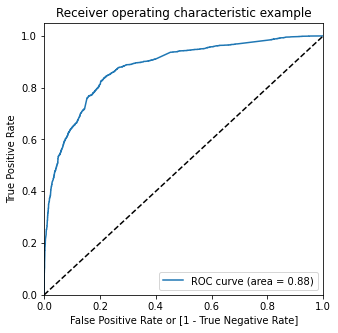

In [172]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.180595,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.319403,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.085574,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.851134,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.500230,7987,1,1,1,1,1,1,1,0,0,0,0


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.594237  0.963614  0.362868
0.2   0.2  0.763817  0.893295  0.682714
0.3   0.3  0.797197  0.852412  0.762612
0.4   0.4  0.806960  0.781276  0.823047
0.5   0.5  0.800819  0.661079  0.888348
0.6   0.6  0.798929  0.593213  0.927785
0.7   0.7  0.786963  0.525348  0.950832
0.8   0.8  0.764447  0.432952  0.972087
0.9   0.9  0.721461  0.295585  0.988220


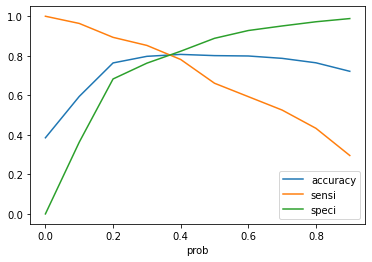

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.180595,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.319403,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.085574,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.851134,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.500230,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [177]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.180595,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.319403,1012,0,1,1,1,1,0,0,0,0,0,0,0,32
2,0,0.085574,9226,0,1,0,0,0,0,0,0,0,0,0,0,9
3,1,0.851134,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.500230,7987,1,1,1,1,1,1,1,0,0,0,0,1,50


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8044402456306093

In [179]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3143,  762],
       [ 480, 1966]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.803761242845462

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.804865556978233

In [183]:
# Calculate false postive rate - predicting  when customer does not have churned
print(FP/ float(TN+FP))

0.19513444302176697


In [184]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7206744868035191


In [185]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8675131106817554


 ## Precision and Recall

In [186]:
#Looking at the confusion matrix again

In [187]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3469,  436],
       [ 829, 1617]], dtype=int64)

##### Precision
TP / TP + FP

In [188]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7876278616658549

##### Recall
TP / TP + FN

In [189]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.66107931316435

Using sklearn utilities for the same

In [190]:
from sklearn.metrics import precision_score, recall_score

In [191]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7876278616658549

In [192]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.66107931316435

### Precision and recall tradeoff

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [195]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

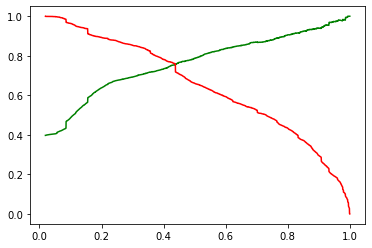

In [196]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [197]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [198]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Specialization_Other Specialization
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0,1
1490,0,1.887326,1,0,1,0,0,0,1,0,1,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0,1
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,1,0,0,0
3830,0,-0.587751,1,0,0,1,0,0,0,0,1,0,0,0,0


In [199]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [200]:
y_test_pred = res.predict(X_test_sm)

In [201]:
y_test_pred[:10]

3271    0.197193
1490    0.958085
7936    0.174081
4216    0.832865
3830    0.126173
1800    0.704941
6507    0.457140
4821    0.271543
4223    0.932146
4714    0.085574
dtype: float64

In [202]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [203]:
# Let's see the head
y_pred_1.head()

,0
3271,0.197193
1490,0.958085
7936,0.174081
4216,0.832865
3830,0.126173


In [204]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [205]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [206]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.197193
1,1,1490,0.958085
2,0,7936,0.174081
3,1,4216,0.832865
4,0,3830,0.126173


In [209]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [210]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns = ['Prospect ID','Converted','Converted_Prob'])

In [211]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.197193
1,1490,1,0.958085
2,7936,0,0.174081
3,4216,1,0.832865
4,3830,0,0.126173


In [213]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [214]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.197193,0
1,1490,1,0.958085,1
2,7936,0,0.174081,0
3,4216,1,0.832865,1
4,3830,0,0.126173,0


In [215]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8002203452074917

In [216]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1407,  327],
       [ 217,  772]], dtype=int64)

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7805864509605662

In [219]:
# Let us calculate specificity
TN / float(TN+FP)

0.8114186851211073

In [220]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.197193,0,20
1,1490,1,0.958085,1,96
2,7936,0,0.174081,0,17
3,4216,1,0.832865,1,83
4,3830,0,0.126173,0,13


## result

### tain data set

Accuracy 80%
sensitivity 80%
specivity 80%

### test data set

Accuracy 80%
sensitivity 78%
specivity 81%

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

lead score greater than 85 as hot lead.

In [221]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,1490,1,0.958085,1,96
8,4223,1,0.932146,1,93
16,1946,1,0.869898,1,87
21,2461,1,0.994964,1,99
23,5822,1,0.998183,1,100
...,...,...,...,...,...
2686,8052,1,0.998183,1,100
2694,1566,1,0.953430,1,95
2699,6461,1,0.972037,1,97
2703,5741,1,0.894553,1,89


In [222]:
## 364 leads have higher chances of being conversion.

## features of model

In [223]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.870277
Lead Source_Welingak Website                            2.665893
What is your current occupation_Working Professional    2.583803
const                                                   1.747645
Total Time Spent on Website                             1.004997
Lead Source_Organic Search                             -0.384635
Lead Source_Direct Traffic                             -0.391358
Lead Source_Referral Sites                             -0.680416
Specialization_Other Specialization                    -1.104708
Lead Origin_Landing Page Submission                    -1.264281
Last Notable Activity_Email Opened                     -1.443274
Last Notable Activity_Page Visited on Website          -1.731995
Last Notable Activity_Email Link Clicked               -1.768517
Do Not Email                                           -1.784873
Last Notable Activity_Modified                         -2.118759
Last Notable Activity_Ola

1.company should focus more on lead origin_lead add form, Lead Source_Welingak Website, What is your current occupation_Working Professional, Total Time Spent on Website as they are more likely to convert as lead
2.company should not make call to Specialization_Other Specialization, Do Not Email, Last Notable Activity_Olark Chat Conversation, Lead Origin_Landing Page Submission, Last Notable Activity_Page Visited on Website they are hardly to convert as lead.